Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train: 0.826, Test: 0.826


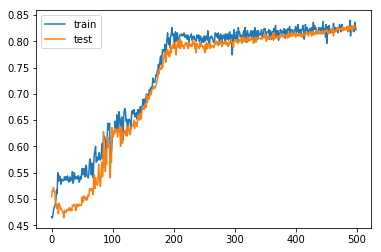

In [1]:
# mlp for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.532, Test: 0.490


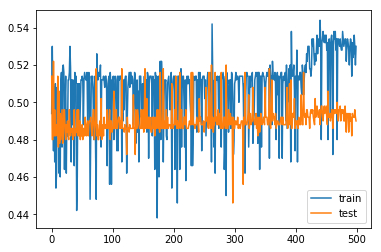

In [2]:
# deeper mlp for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
init = RandomUniform(minval=0, maxval=1)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.836, Test: 0.836


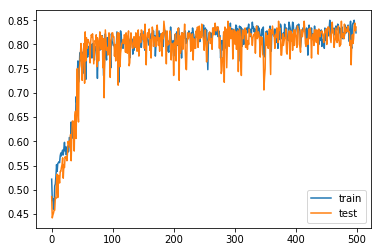

In [4]:
# deeper mlp with relu for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [5]:
# deeper mlp for the two circles classification problem with callback
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from keras.callbacks import TensorBoard
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
init = RandomUniform(minval=0, maxval=1)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# prepare callback
tb = TensorBoard(histogram_freq=1, write_grads=True)
# fit model
model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0, callbacks=[tb])

In [9]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2019-05-08 11:33:34--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.232.40.183, 34.196.237.103, 52.207.111.186, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.232.40.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14991793 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  14.30M  18.7MB/s    in 0.8s    

2019-05-08 11:33:40 (18.7 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [14991793/14991793]



In [10]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = './logs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [7]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://c3fcecf1.ngrok.io


In [4]:
# deeper mlp with relu for the two circles classification problem with callback
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import TensorBoard
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# prepare callback
tb = TensorBoard(histogram_freq=1, write_grads=True)
# fit model
model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0, callbacks=[tb])